# Rainfall Analysis Report (2018–2022)

**Prepared by:** Mboya Jackline Achieng'

**Women in Data Science Fellowship Application** 

**Date:** 7/28/2025 

---


**Title:** Rainfall Analysis of Five African Countries Using CHIRPS Data  
**Period Covered:** January 2018 – December 2022  
**Data Source:** [Digital Earth Africa – CHIRPS Monthly Rainfall](https://registry.opendata.aws/deafrica-chirps/)  
**Tools Used:** Python (pandas, seaborn, matplotlib)  

**Purpose:**  
This analysis aims to assess rainfall trends and anomalies across selected African countries over a five-year period and explore how rainfall variability could influence agriculture and climate resilience strategies.

---

## Introduction

Rainfall patterns play a central role in determining agricultural output and food security, especially in Sub-Saharan Africa where farming is predominantly rain-fed. Understanding these patterns is crucial for guiding crop planning, irrigation needs, and resilience strategies in the face of climate variability.

This analysis uses rainfall data from the Climate Hazards Group InfraRed Precipitation with Station data (CHIRPS), as provided by Digital Earth Africa. The dataset includes monthly rainfall totals (in millimeters) for various regions across five African countries from 2018 to 2022.

The goal of this report is to:
- Identify trends, seasonal patterns, and anomalies in rainfall across regions and years;
- Discuss the implications of rainfall variability on agriculture and food systems;
- Recommend an additional dataset that can enhance decision-making in climate or agrifood policy.

---



In [105]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set styles for better visualization
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 8)

### Load the Dataset

In [106]:
 #Step 1: Load the dataset
rainfall_data = pd.read_csv('CHIRPS_5_Countries_2018_2022.csv', encoding='latin1')
#rainfall_data.to_csv('CHIRPS_5_Countries_2018_2022_clean.csv', index=False, encoding='utf-8')
rainfall_data.head()

,Country,Region,Year,Month,Rainfall_mm
0,Kenya,Nairobi,2018,1,25.41
1,Kenya,Nairobi,2018,2,214.89
2,Kenya,Nairobi,2018,3,218.55
3,Kenya,Nairobi,2018,4,256.78
4,Kenya,Nairobi,2018,5,291.81


In [107]:
rainfall_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Country      900 non-null    object 
 1   Region       900 non-null    object 
 2   Year         900 non-null    int64  
 3   Month        900 non-null    int64  
 4   Rainfall_mm  900 non-null    float64
dtypes: float64(1), int64(2), object(2)
memory usage: 35.3+ KB


In [108]:
rainfall_data.shape

(900, 5)

The dataset contains 5 variables (see below) and 900 entries of data

| Variable     | Type        | Description                                                              |
|--------------|-------------|--------------------------------------------------------------------------|
| Country      | Categorical | Name of the country where rainfall was recorded (e.g., Kenya, Nigeria).  |
| Region       | Categorical | Specific region or administrative unit within the country.              |
| Year         | Integer     | Calendar year of the rainfall observation (2018 to 2022).               |
| Month        | Integer     | Month of the observation (1 = January, 12 = December).                  |
| Rainfall_mm  | Float       | Recorded rainfall amount in millimeters (mm) for the region and month. |

In [109]:
rainfall_data["Country"].unique()

array(['Kenya', 'Ethiopia', 'Malawi', 'Benin', 'Côte d\x92Ivoire'],
      dtype=object)

In [110]:
rainfall_data['Country'] = rainfall_data['Country'].replace("Côte d\x92Ivoire", "Côte d'Ivoire")

# Confirm the replacement was successful
rainfall_data['Country'].unique()

array(['Kenya', 'Ethiopia', 'Malawi', 'Benin', "Côte d'Ivoire"],
      dtype=object)

### Data Cleaning

In [111]:
rainfall_data.isna().sum()

Country        0
Region         0
Year           0
Month          0
Rainfall_mm    0
dtype: int64

The dataset contains no null values.

In [112]:
# Convert Month to actual month names for better plotting
month_names = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
               7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
rainfall_data['month_name'] = rainfall_data['Month'].map(month_names)

In [113]:
rainfall_data.head()

,Country,Region,Year,Month,Rainfall_mm,month_name
0,Kenya,Nairobi,2018,1,25.41,Jan
1,Kenya,Nairobi,2018,2,214.89,Feb
2,Kenya,Nairobi,2018,3,218.55,Mar
3,Kenya,Nairobi,2018,4,256.78,Apr
4,Kenya,Nairobi,2018,5,291.81,May


In [114]:
# Create a date
rainfall_data['Date'] = pd.to_datetime(rainfall_data['Year'].astype(str) + '-' + rainfall_data['Month'].astype(str) + '-01')


# Sort by date for time series
rainfall_data.sort_values('Date', inplace=True)

rainfall_data.head()


,Country,Region,Year,Month,Rainfall_mm,month_name,Date
0,Kenya,Nairobi,2018,1,25.41,Jan,2018-01-01
360,Malawi,Lilongwe,2018,1,145.66,Jan,2018-01-01
540,Benin,Cotonou,2018,1,10.17,Jan,2018-01-01
780,Côte d'Ivoire,Bouaké,2018,1,315.61,Jan,2018-01-01
120,Kenya,Mombasa,2018,1,317.67,Jan,2018-01-01


In [115]:
# Monthly average rainfall per country
monthly_avg = rainfall_data.groupby(['Country', 'Date', 'month_name'])['Rainfall_mm'].mean().reset_index()
monthly_avg.head()

,Country,Date,month_name,Rainfall_mm
0,Benin,2018-01-01,Jan,45.000000
1,Benin,2018-02-01,Feb,175.276667
2,Benin,2018-03-01,Mar,84.633333
3,Benin,2018-04-01,Apr,259.563333
4,Benin,2018-05-01,May,118.070000


In [116]:
monthly_avg_sorted = monthly_avg.sort_values(by='Rainfall_mm', ascending=False)

#top 10 average monthly rainfall
top_10_monthly_avg = monthly_avg_sorted.groupby('Country').head(10)

In [117]:
top_10_monthly_avg.head()

,Country,Date,month_name,Rainfall_mm
231,Kenya,2022-04-01,Apr,370.560000
255,Malawi,2019-04-01,Apr,364.673333
100,Côte d'Ivoire,2021-05-01,May,363.846667
238,Kenya,2022-11-01,Nov,344.966667
138,Ethiopia,2019-07-01,Jul,338.873333


## Exploratory Data Analysis

In [118]:
# Sort the DataFrame by Country, Region, and Date
rainfall_sorted = rainfall_data.sort_values(by=['Country', 'Region', 'Date'])

# Get unique countries and regions
unique_countries = rainfall_sorted['Country'].unique()
unique_regions = rainfall_sorted['Region'].unique()

In [119]:
unique_countries

array(['Benin', "Côte d'Ivoire", 'Ethiopia', 'Kenya', 'Malawi'],
      dtype=object)

In [120]:
unique_regions

array(['Abomey', 'Cotonou', 'Parakou', 'Abidjan', 'Bouaké', 'Korhogo',
       'Addis Ababa', 'Hawassa', 'Mekelle', 'Kisumu', 'Mombasa',
       'Nairobi', 'Blantyre', 'Lilongwe', 'Mzuzu'], dtype=object)

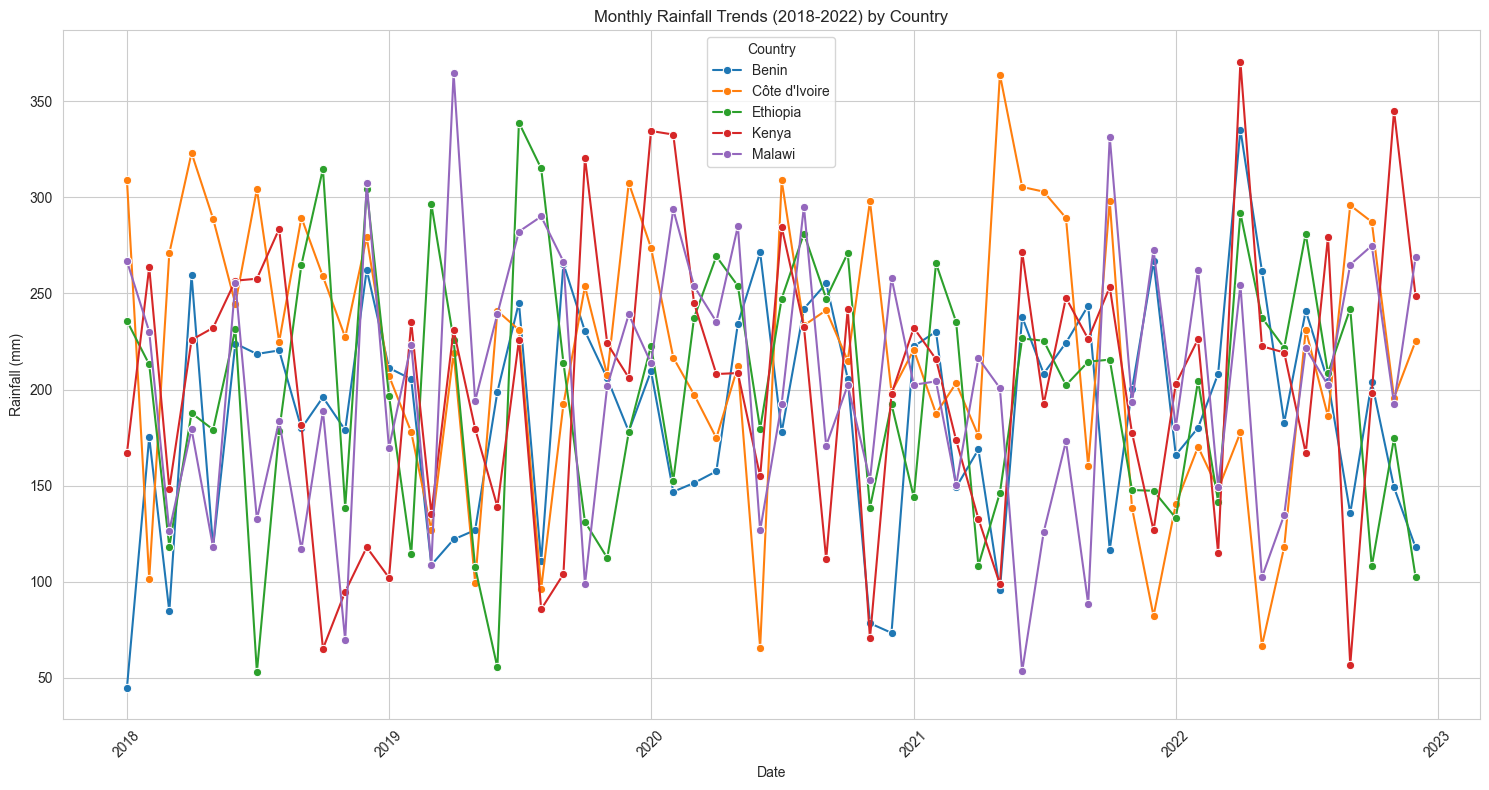

In [121]:
# Plotting monthly rainfall for each country
plt.figure(figsize=(15, 8))
sns.lineplot(data=rainfall_sorted, x='Date', y='Rainfall_mm', hue='Country', errorbar=None, marker='o')
plt.title('Monthly Rainfall Trends (2018-2022) by Country')
plt.xlabel('Date')
plt.ylabel('Rainfall (mm)')
plt.grid(True)
plt.legend(title='Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('monthly_rainfall_by_country_trend.png')
plt.show()

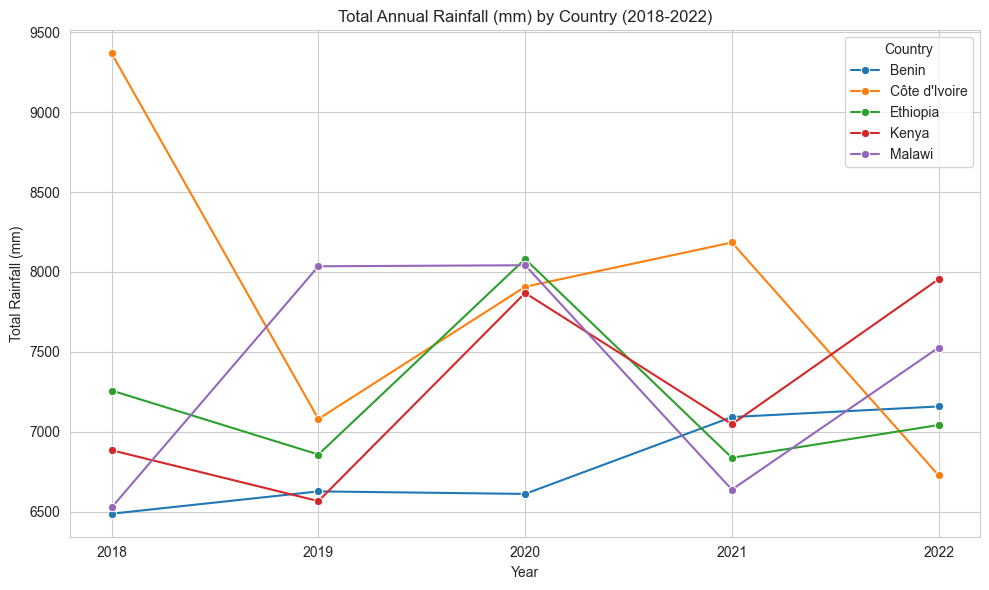

In [154]:
# Calculate total annual rainfall for each country
annual_rainfall_country = rainfall_data.groupby(['Country', 'Year'])['Rainfall_mm'].sum().reset_index()

# Plotting the annual rainfall for each country
plt.figure(figsize=(10, 6))
sns.lineplot(data=annual_rainfall_country, x='Year', y='Rainfall_mm', hue='Country', marker='o')
plt.title('Total Annual Rainfall (mm) by Country (2018-2022)')
plt.xlabel('Year')
plt.ylabel('Total Rainfall (mm)')
plt.xticks(annual_rainfall_country['Year'].unique())
plt.grid(True)
plt.legend(title='Country')
plt.tight_layout()
plt.savefig('annual_rainfall_by_country.png')
plt.show()

#### **Key Observations**:
- Côte d’Ivoire :
Shows the highest total annual rainfall in 2018 (~9500 mm). Experiences a significant decline in rainfall from 2018 to 2019, followed by fluctuations but generally lower totals compared to 2018.
- Malawi :
Consistently high rainfall throughout the period.
Peaks at around 8000 mm in 2020, making it one of the wettest years for Malawi.
- Ethiopia :
Relatively stable rainfall pattern with slight increases over time.
Reaches its peak in 2020 (~8000 mm), similar to Malawi.
- Kenya :
Moderate rainfall levels compared to other countries.
Shows an increasing trend from 2019 to 2022, with a notable rise in 2022.
- Benin :
The lowest total annual rainfall among the five countries.
Exhibits a gradual increase from 2018 to 2022, stabilizing around 7000 mm.
##### **Insights**:
- Côte d’Ivoire had an exceptionally wet year in 2018, which sharply declined afterward.
- Malawi and Ethiopia are consistently wetter than the other countries, with peaks in 2020.
- Kenya shows a recovery trend after a dry period in 2019.
- Benin remains the driest country overall but has shown improvement in recent years.

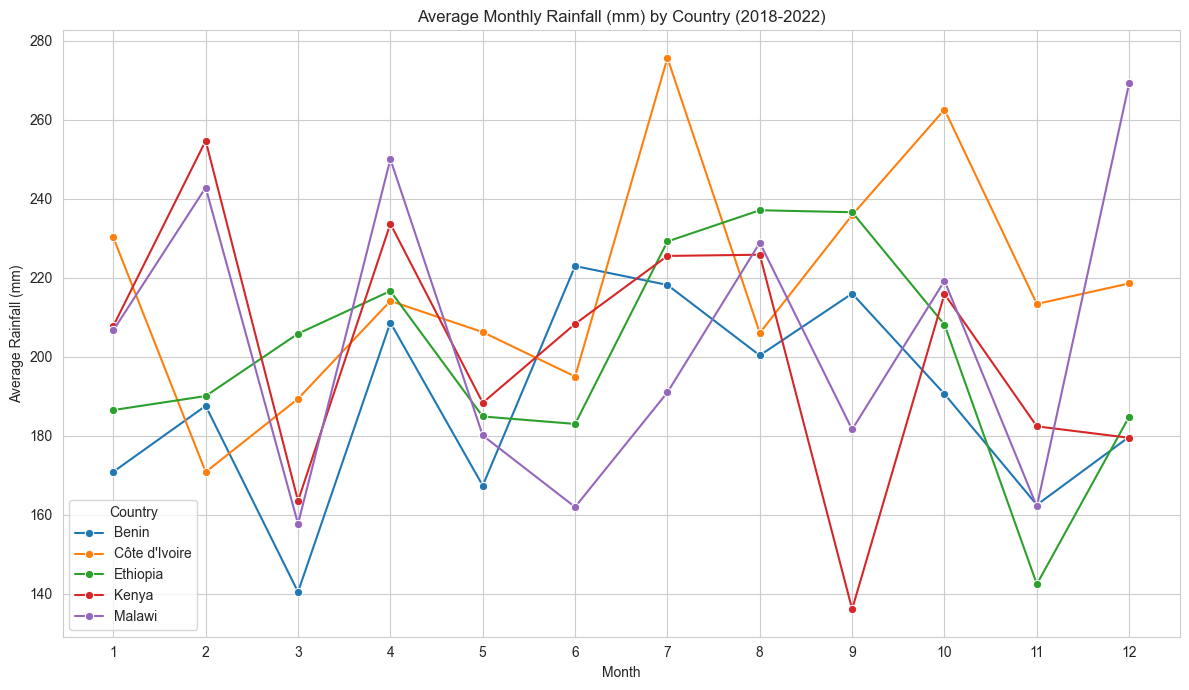

In [126]:
# Calculate average monthly rainfall across all years for each country to observe seasonal patterns
monthly_avg_rainfall_country = rainfall_data.groupby(['Country', 'Month'])['Rainfall_mm'].mean().reset_index()

# Plotting the average monthly rainfall for each country
plt.figure(figsize=(12, 7))
sns.lineplot(data=monthly_avg_rainfall_country, x='Month', y='Rainfall_mm', hue='Country', marker='o')
plt.title('Average Monthly Rainfall (mm) by Country (2018-2022)')
plt.xlabel('Month')
plt.ylabel('Average Rainfall (mm)')
plt.xticks(range(1, 13))
plt.grid(True)
plt.legend(title='Country')
plt.tight_layout()
plt.savefig('average_monthly_rainfall_by_country.png')
plt.show()

Interpretation:

**Distinct Seasonal Patterns**:

- **Bimodal Pattern** (East Africa: Kenya, Uganda, Malawi): Countries like Kenya and Uganda exhibit a "bimodal" pattern with two distinct rainy seasons. The first peak typically occurs around March-May (Long Rains), and the second, generally shorter, peak occurs around October-December (Short Rains). This pattern is characteristic of regions influenced by the bi-annual movement of the Intertropical Convergence Zone (ITCZ).

- **Unimodal Pattern** (West Africa: Mali, Niger, Côte d’Ivoire): Countries in West Africa generally show a "unimodal" pattern, with a single, extended rainy season that typically peaks between July and September. This aligns with the ITCZ's northward movement during the Northern Hemisphere's summer.

**Rainfall Intensity**: The intensity of rainfall during peak months varies significantly among countries. For example, Côte d’Ivoire often shows higher average monthly rainfall during its peak season compared to more arid countries like Niger.

**Dry Seasons**: Conversely, periods with very low average monthly rainfall are also clearly visible, representing the dry seasons that impact planting decisions and necessitate water conservation strategies.

**Implication**: Understanding these distinct monthly and seasonal patterns is fundamental for farmers to determine optimal planting and harvesting times, manage irrigation, and select appropriate crop varieties. Deviations from these average patterns can lead to agricultural challenges, as discussed in the anomalies section.

### Anomalies

In [145]:
# Define the new anomaly thresholds
max_threshold = 350
min_threshold = 30

# Identify very high rainfall anomalies based on the new threshold
high_anomalies_fixed = rainfall_data[rainfall_data['Rainfall_mm'] > max_threshold]

# Identify very low rainfall anomalies based on the new threshold
low_anomalies_fixed = rainfall_data[rainfall_data['Rainfall_mm'] < min_threshold]

In [146]:
print(f"Rainfall Anomalies: Months with Rainfall Greater than {max_threshold} mm:")
print(high_anomalies_fixed[['Country', 'Region', 'Year', 'Month', 'Rainfall_mm']].sort_values(by='Rainfall_mm', ascending=False))

print(f"\nRainfall Anomalies: Months with Rainfall Less than {min_threshold} mm:")
print(low_anomalies_fixed[['Country', 'Region', 'Year', 'Month', 'Rainfall_mm']].sort_values(by='Rainfall_mm', ascending=True))

Rainfall Anomalies: Months with Rainfall Greater than 350 mm:
           Country       Region  Year  Month  Rainfall_mm
231       Ethiopia  Addis Ababa  2022      4       399.89
754  Côte d'Ivoire      Abidjan  2020     11       399.18
547          Benin      Cotonou  2018      8       398.77
232       Ethiopia  Addis Ababa  2022      5       398.67
804  Côte d'Ivoire       Bouaké  2020      1       397.99
..             ...          ...   ...    ...          ...
254       Ethiopia      Mekelle  2019      3       351.28
750  Côte d'Ivoire      Abidjan  2020      7       350.51
648          Benin      Parakou  2022      1       350.19
760  Côte d'Ivoire      Abidjan  2021      5       350.10
314       Ethiopia      Hawassa  2019      3       350.06

[125 rows x 5 columns]

Rainfall Anomalies: Months with Rainfall Less than 30 mm:
           Country       Region  Year  Month  Rainfall_mm
521         Malawi        Mzuzu  2021      6         6.83
868  Côte d'Ivoire      Korhogo  2020      

In [148]:
high_anomalies_fixed.count()

Country        125
Region         125
Year           125
Month          125
Rainfall_mm    125
month_name     125
Date           125
dtype: int64

In [152]:
low_anomalies_fixed.count()

Country        55
Region         55
Year           55
Month          55
Rainfall_mm    55
month_name     55
Date           55
dtype: int64

#### Anomalies

- Anomalies, defined as months with rainfall exceeding 350 mm (very high) or falling below 30 mm (very low), were identified. A total of 125 entries recorded very high rainfall events, such as Addis Ababa, Ethiopia in April 2022 (399.89 mm) and Abidjan, Côte d’Ivoire in November 2020 (399.18 mm). Conversely, 55 months experienced very low rainfall, with instances like Mzuzu, Malawi in June 2021 (6.83 mm) and Korhogo, Côte d’Ivoire in May 2020 (7.52 mm). These extreme events represent significant variations from typical conditions.

### Anomalies Using Standard Deviation

In [139]:
# Sort the DataFrame by Rainfall_mm to find the highest and lowest
df_sorted_high = rainfall_data.sort_values(by='Rainfall_mm', ascending=False)
df_sorted_low = rainfall_data.sort_values(by='Rainfall_mm', ascending=True)

# Get the top 5 highest rainfall events
top_5_high_rainfall = df_sorted_high.head(5)
print("Top 5 Highest Rainfall Events:")
print(top_5_high_rainfall)

# Get the top 5 lowest rainfall events
top_5_low_rainfall = df_sorted_low[df_sorted_low['Rainfall_mm'] > 0].head(5)
if top_5_low_rainfall.empty and (df_sorted_low['Rainfall_mm'] == 0).any():
    top_5_low_rainfall = df_sorted_low[df_sorted_low['Rainfall_mm'] == 0].head(5)
print("\nTop 5 Lowest Rainfall Events (excluding 0 unless all are 0):")
print(top_5_low_rainfall)


# Calculate monthly average and standard deviation for each Country and Region
monthly_stats = rainfall_data.groupby(['Country', 'Region', 'Month'])['Rainfall_mm'].agg(['mean', 'std']).reset_index()
monthly_stats.rename(columns={'mean': 'Mean_Rainfall', 'std': 'Std_Dev_Rainfall'}, inplace=True)

# Merge the monthly statistics with the original DataFrame
df_merged = pd.merge(rainfall_data, monthly_stats, on=['Country', 'Region', 'Month'], how='left')

# Define a threshold for anomalies
n_std_flexible = 1.5

# Identify very high rainfall 'outliers' (more than n_std_flexible standard deviations above the mean)
df_merged['Outlier_High'] = (df_merged['Rainfall_mm'] > (df_merged['Mean_Rainfall'] + n_std_flexible * df_merged['Std_Dev_Rainfall']))

# Identify very low rainfall 'outliers' (more than n_std_flexible standard deviations below the mean)
df_merged['Outlier_Low'] = (df_merged['Rainfall_mm'] < (df_merged['Mean_Rainfall'] - n_std_flexible * df_merged['Std_Dev_Rainfall']))

# Filter for rows that are considered 'outliers' (either high or low)
outliers = df_merged[df_merged['Outlier_High'] | df_merged['Outlier_Low']]

print("\nIdentified Rainfall Outliers (using 1.5 standard deviations from monthly regional mean):")
print(outliers[['Country', 'Region', 'Year', 'Month', 'Rainfall_mm', 'Mean_Rainfall', 'Std_Dev_Rainfall', 'Outlier_High', 'Outlier_Low']])

print("\nSummary of Outliers by Country and Region:")
outlier_counts = outliers.groupby(['Country', 'Region']).size().reset_index(name='Outlier_Count')
print(outlier_counts.sort_values(by='Outlier_Count', ascending=False))

Top 5 Highest Rainfall Events:
           Country       Region  Year  Month  Rainfall_mm month_name  \
231       Ethiopia  Addis Ababa  2022      4       399.89        Apr   
754  Côte d'Ivoire      Abidjan  2020     11       399.18        Nov   
547          Benin      Cotonou  2018      8       398.77        Aug   
232       Ethiopia  Addis Ababa  2022      5       398.67        May   
804  Côte d'Ivoire       Bouaké  2020      1       397.99        Jan   

          Date  
231 2022-04-01  
754 2020-11-01  
547 2018-08-01  
232 2022-05-01  
804 2020-01-01  

Top 5 Lowest Rainfall Events (excluding 0 unless all are 0):
           Country   Region  Year  Month  Rainfall_mm month_name       Date
521         Malawi    Mzuzu  2021      6         6.83        Jun 2021-06-01
868  Côte d'Ivoire  Korhogo  2020      5         7.52        May 2020-05-01
107          Kenya   Kisumu  2021     12         9.28        Dec 2021-12-01
645          Benin  Parakou  2021     10         9.34        Oct 202

In [140]:
# Define countries for East and West Africa
east_africa_countries = ['Kenya', 'Ethiopia', 'Malawi']
west_africa_countries = ['Benin', 'Côte d’Ivoire']

In [142]:
# Calculate seasonal totals for East African countries
# Long Rains (Mar-May)
long_rains_ea = rainfall_data[rainfall_data['Country'].isin(east_africa_countries) & rainfall_data['Month'].isin([3, 4, 5])]
long_rains_ea_total = long_rains_ea.groupby(['Country', 'Region', 'Year'])['Rainfall_mm'].sum().reset_index()
long_rains_ea_total.rename(columns={'Rainfall_mm': 'Long_Rains_mm'}, inplace=True)

# Short Rains (Oct-Dec)
short_rains_ea = rainfall_data[rainfall_data['Country'].isin(east_africa_countries) & rainfall_data['Month'].isin([10, 11, 12])]
short_rains_ea_total = short_rains_ea.groupby(['Country', 'Region', 'Year'])['Rainfall_mm'].sum().reset_index()
short_rains_ea_total.rename(columns={'Rainfall_mm': 'Short_Rains_mm'}, inplace=True)

print("East Africa - Long Rains (Mar-May) Totals:")
print(long_rains_ea_total.head())
print("\nEast Africa - Short Rains (Oct-Dec) Totals:")
print(short_rains_ea_total.head())

East Africa - Long Rains (Mar-May) Totals:
    Country       Region  Year  Long_Rains_mm
0  Ethiopia  Addis Ababa  2018         673.23
1  Ethiopia  Addis Ababa  2019         568.27
2  Ethiopia  Addis Ababa  2020        1074.89
3  Ethiopia  Addis Ababa  2021         699.06
4  Ethiopia  Addis Ababa  2022        1124.66

East Africa - Short Rains (Oct-Dec) Totals:
    Country       Region  Year  Short_Rains_mm
0  Ethiopia  Addis Ababa  2018          791.58
1  Ethiopia  Addis Ababa  2019          670.47
2  Ethiopia  Addis Ababa  2020          385.37
3  Ethiopia  Addis Ababa  2021          471.98
4  Ethiopia  Addis Ababa  2022          341.68


In [143]:
# Calculate seasonal totals for West African countries (Main Rainy Season: Jun-Sep)
main_rainy_season_wa = rainfall_data[rainfall_data['Country'].isin(west_africa_countries) & rainfall_data['Month'].isin([6, 7, 8, 9])]
main_rainy_season_wa_total = main_rainy_season_wa.groupby(['Country', 'Region', 'Year'])['Rainfall_mm'].sum().reset_index()
main_rainy_season_wa_total.rename(columns={'Rainfall_mm': 'Main_Rainy_Season_mm'}, inplace=True)

print("\nWest Africa - Main Rainy Season (Jun-Sep) Totals:")
print(main_rainy_season_wa_total.head())


West Africa - Main Rainy Season (Jun-Sep) Totals:
  Country  Region  Year  Main_Rainy_Season_mm
0   Benin  Abomey  2018                785.60
1   Benin  Abomey  2019                604.15
2   Benin  Abomey  2020               1041.23
3   Benin  Abomey  2021               1186.68
4   Benin  Abomey  2022                751.07
